# Yearly Clustering Comparison Analysis

We run our chosen clustering model on demographic subsets of the data and measure the similarity of the produced clusterings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 6]

%matplotlib inline

In [2]:
# Read in data
data = pd.read_csv('../data/features/merged.csv')

## Setup Best Model & Hyperparameters

In [3]:
from sklearn.cluster import AgglomerativeClustering

# See Model Selection.ipynb for why we chose these params.
cluster_model_params = {'affinity': 'euclidean', 'linkage': 'complete', 'n_clusters': 5}
cluster_model = AgglomerativeClustering()
cluster_model.set_params(**cluster_model_params)

AgglomerativeClustering(linkage='complete', n_clusters=5)

# Compare Clusters

## Compare across different years

In [4]:
# Set years
years = [2016, 2017, 2018, 2019]

In [5]:
from util_comparisons import compute_similarity_matrix, create_training_data_year

# remove all cols with demographic info
remove_cols = ['BLACK', 'WHITE', 'HISPANIC', 'CENSUS']

result_df = compute_similarity_matrix(data, years, remove_cols, create_training_data_year, cluster_model)

In [6]:
result_df

col,2016.0,2017.0,2018.0,2019.0
row,,,,
2016.0,1.000000,0.534055,0.634101,0.631278
2017.0,0.534055,1.000000,0.765272,0.765991
2018.0,0.634101,0.765272,1.000000,0.896950
2019.0,0.631278,0.765991,0.896950,1.000000


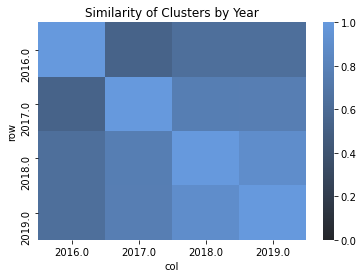

In [7]:
sns.heatmap(result_df, cmap=sns.dark_palette("#69d", as_cmap=True),vmin=0, vmax=1)
plt.title('Similarity of Clusters by Year')
plt.savefig('../report/figures/year_comparison/similarity_by_year.png', dpi=300)